In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [36]:
url = r"https://raw.githubusercontent.com/yakincc/BBVA_PricePrediction_Abehackers/master/dataset_tasacion_train.xlsx"
df = pd.read_excel(url)

geo_df = df[['Latitud (Decimal)', 'Longitud (Decimal)', 'Valor comercial']].copy()
geo_df.columns = ['Latitud', 'Longitud', 'Precio']

In [38]:
#NaN dropping values
geo_df = geo_df.dropna()
geo_df.reset_index(drop=True)
geo_df = geo_df.query('Latitud < -0.03 & Latitud > -18.3522222 & Longitud > -81.32638888888889 & Longitud < -68.6575')

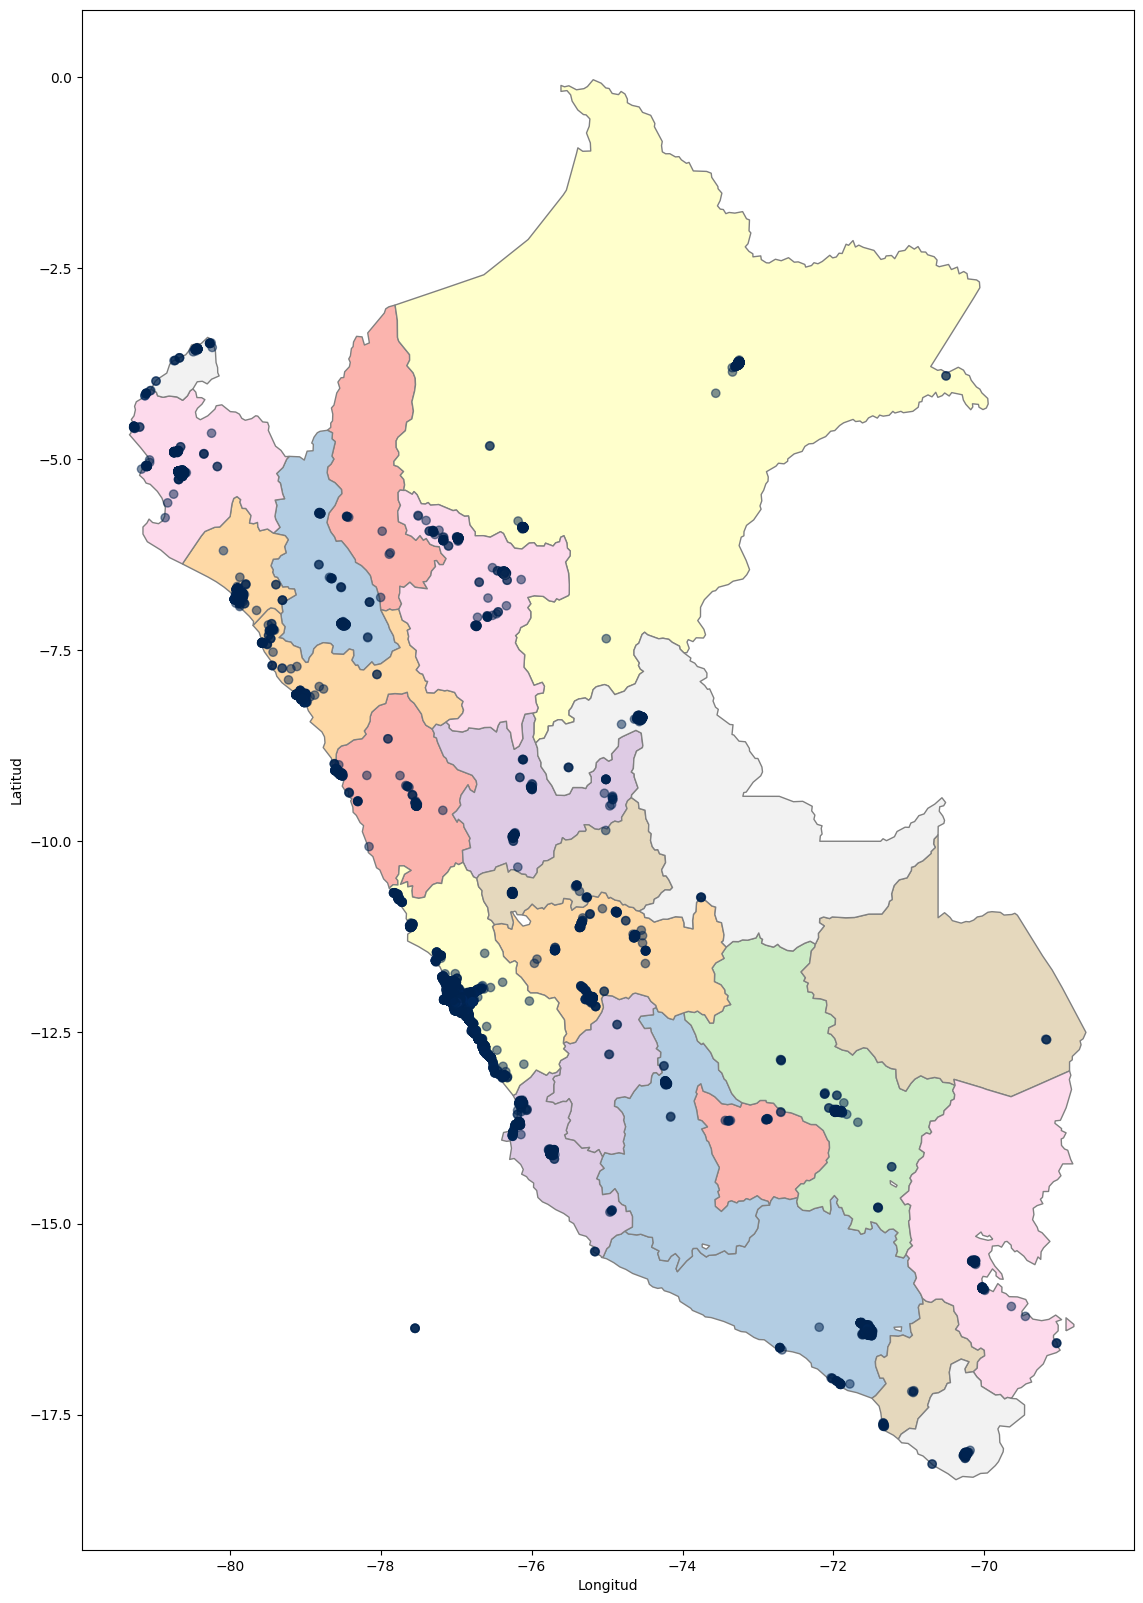

In [46]:

url_geojson = r'https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_departamental_simple.geojson'
region_geojson = gpd.read_file(url_geojson)
region_geojson.head()

ax = region_geojson.plot(figsize=(20,20),edgecolor=u'gray', cmap='Pastel1')
plt.scatter(x=geo_df['Longitud'], y=geo_df['Latitud'], c = geo_df['Precio'], cmap= 'cividis', alpha = 0.5)
plt.ylabel('Latitud')
plt.xlabel('Longitud')
plt.show()
